In [170]:
import numpy as np
from scipy.linalg import expm
from scipy.io import loadmat, savemat

In [3]:
A = np.array(
    [
    [0 , 1 , 0 , 0 , 0 , 0],
    [-2 , 0 , 1 , 0 , -1 , 0 ],
    [0 , 0 , 0 , 1 , 0 , 0],
    [1 , 0 , -2 , 0, 1 , 1],
    [0 , 0 , 0 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 0]
    ])

In [4]:
At = A * 0.05

In [6]:
e_hat = expm(At)

In [10]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [11]:
e_hat

array([[0.997501, 0.049958, 0.001249, 0.000021, -0.001249, 0.000000],
       [-0.099896, 0.997501, 0.049917, 0.001249, -0.049938, 0.000021],
       [0.001249, 0.000021, 0.997501, 0.049958, 0.001249, 0.001249],
       [0.049917, 0.001249, -0.099896, 0.997501, 0.049938, 0.049958],
       [0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000]])

In [9]:
theta = symbol('theta')

NameError: name 'symbol' is not defined

In [12]:
F = np.array([
    [0.997501, 0.049958, 0.001249, 0.000021],
    [-0.099896, 0.997501, 0.049917, 0.001249],
    [0.001249, 0.000021, 0.997501, 0.049958],
    [0.049917, 0.001249, -0.099896, 0.997501]
])

In [24]:
G = np.array([
    [-0.001249, 0.000000],
    [-0.049938, 0.000021],
     [0.001249, 0.001249],
     [0.049938, 0.049958]
])

In [26]:
H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, -1]
])

In [14]:
test_mat = loadmat("hw3problem1data.mat")

In [20]:
data_u = test_mat['Udata']
data_y = test_mat['Ydata']

In [22]:
data_y.shape

(100, 2)

In [23]:
data_u.shape

(101, 2)

In [175]:
O_rows = []
O_rows.append(H)
O_rows.append(np.matmul(H, F))
F_prev = F
for i in range(100-2):
    F_new = np.matmul(F_prev, F)
    O_rows.append(np.matmul(H, F_new))
    F_prev = F_new

In [176]:
len(O_rows)

100

In [177]:
P_blocks = []
for i in range(len(O_rows)): # use every block except the last one...
    P_blocks.append(np.matmul(O_rows[i], G))

In [174]:
np.matmul(np.matmul(H, F), G)

array([[-0.003738, 0.000004],
       [-0.099127, -0.049563]])

In [179]:
np.matmul(H, G)

array([[-0.001249, 0.000000],
       [-0.099876, -0.049937]])

In [178]:
P_blocks[0]

array([[-0.001249, 0.000000],
       [-0.099876, -0.049937]])

In [37]:
zero = np.array([
    [0, 0],
    [0, 0]
])

array([[-0.017110, -0.031926],
       [0.080500, 0.040249]])

In [180]:
P = []
# get the element out of P_blocks
for i in range(100):
    # append a matrix to each column
    row = []
    for j in range(100):
        if i - j - 1 < 0:
            row.append(zero)
        else:
            if i-j-1 == 99:
                print("PANIC")
            row.append(P_blocks[i-j-1])
    P.append(row)

In [181]:
# concatenate the columns
rows = []
for i in range(100):
    row = P[i][0]
    for j in range(1, 100):
        row = np.block([row, P[i][j]])
    rows.append(row)
    
# concatenate the rows
P_Mat = rows[0]
for k in range(1, 100):
    P_Mat = np.block([[P_Mat], [rows[k]]])

In [182]:
P_Mat.shape

(200, 200)

In [183]:
# Create the O Matrix
O_Mat = O_rows[0]
for i in range(1, 100):
    O_Mat = np.block([[O_Mat], [O_rows[i]]])

In [184]:
O_Mat

array([[1.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 1.000000, 0.000000, -1.000000],
       [0.997501, 0.049958, 0.001249, 0.000021],
       [-0.149813, 0.996252, 0.149813, -0.996252],
       [0.990020, 0.099666, 0.004983, 0.000167],
       [-0.298503, 0.985037, 0.298503, -0.985037],
       [0.977604, 0.148877, 0.011166, 0.000561],
       [-0.444956, 0.966439, 0.444956, -0.966439],
       [0.960331, 0.197345, 0.019735, 0.001323],
       [-0.588073, 0.940597, 0.588073, -0.940597],
       [0.938308, 0.244830, 0.030603, 0.002573],
       [-0.726782, 0.907705, 0.726782, -0.907705],
       [0.911672, 0.291098, 0.043663, 0.004421],
       [-0.860044, 0.868009, 0.860044, -0.868009],
       [0.880590, 0.335923, 0.058782, 0.006974],
       [-0.986860, 0.821808, 0.986860, -0.821808],
       [0.845253, 0.379086, 0.075806, 0.010331],
       [-1.106279, 0.769447, 1.106279, -0.769447],
       [0.805882, 0.420380, 0.094563, 0.014583],
       [-1.217406, 0.711319, 1.217406, -0.711319],
 

In [163]:
O_Mat.shape

(200, 4)

In [185]:
# Reshape the input vectors
u_vec = data_u[1]
for i in range(1, 100):
    u_vec = np.block([u_vec, data_u[i+1][:]]) 

y_vec = data_y[0]
for i in range(1, 100):
    y_vec = np.block([y_vec, data_y[i][:]]) 
    

In [186]:
Os = np.matmul(np.linalg.inv(np.matmul(O_Mat.transpose(), O_Mat)), O_Mat.transpose())
diff = y_vec - np.matmul(P_Mat, u_vec)

In [187]:
x_0 = np.matmul(Os, diff)

In [188]:
x_0

array([0.114315, 0.271710, -0.371911, -0.814520])

In [132]:
O_Mat[0]

array([1.000000, 0.000000, 0.000000, 0.000000])

In [168]:
P_Mat[2]

array([-0.006199, 0.000017, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.00

In [189]:
x_0

array([0.114315, 0.271710, -0.371911, -0.814520])

In [341]:
x_vals = []
x_0 = np.array([0.114315, 0.271710, -0.371911, -0.814520])
x_vals.append(x_0)
x_prev = x_0
u_idx = 0
for i in np.arange(0, 5.05, 0.05):
    x_curr = np.matmul(F, x_prev.transpose()) + np.matmul(G, data_u[u_idx].transpose())
    x_vals.append(x_curr)
    x_prev = x_curr
    u_idx += 1

ValueError: shapes (2,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

In [193]:
x_vals

[array([0.114315, 0.271710, -0.371911, -0.814520]),
 array([0.127122, 0.240029, -0.411525, -0.769286]),
 array([0.138265, 0.205228, -0.448765, -0.719609]),
 array([0.147597, 0.167603, -0.483416, -0.665823]),
 array([0.154983, 0.127477, -0.515284, -0.608291]),
 array([0.160308, 0.085195, -0.544189, -0.547400]),
 array([0.163473, 0.041120, -0.569974, -0.483561]),
 array([0.164396, -0.004368, -0.592502, -0.417203]),
 array([0.163019, -0.050877, -0.611659, -0.348772]),
 array([0.159298, -0.098002, -0.627352, -0.278724]),
 array([0.153215, -0.145334, -0.639512, -0.207528]),
 array([0.144768, -0.192458, -0.648093, -0.135658]),
 array([0.133979, -0.238959, -0.653074, -0.063591]),
 array([0.120889, -0.284425, -0.654456, 0.008196]),
 array([0.105561, -0.328449, -0.652266, 0.079233]),
 array([0.088075, -0.370633, -0.646553, 0.149052]),
 array([0.068535, -0.410593, -0.637389, 0.217202]),
 array([0.047059, -0.447959, -0.624868, 0.283240]),
 array([0.023788, -0.482378, -0.609107, 0.346743]),
 array

In [200]:
y_vals = []
for i in range(len(x_vals)):
    y_val = np.matmul(H, x_vals[i].transpose())
    y_vals.append(y_val)

In [202]:
len(y_vals)

102

In [203]:
t = [i for i in np.arange(0, 5.05, 0.05)]

In [204]:
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
y_vals

[array([0.114315, 1.086230]),
 array([0.127122, 1.004322]),
 array([0.138203, 0.909901]),
 array([0.147287, 0.803700]),
 array([0.154120, 0.686551]),
 array([0.158468, 0.559384]),
 array([0.160120, 0.423211]),
 array([0.158889, 0.279129]),
 array([0.154615, 0.128303]),
 array([0.147167, -0.028040]),
 array([0.136441, -0.188618]),
 array([0.122366, -0.352109]),
 array([0.104900, -0.517157]),
 array([0.084036, -0.682383]),
 array([0.059798, -0.846397]),
 array([0.032241, -1.007810]),
 array([0.001456, -1.165241]),
 array([-0.032437, -1.317330]),
 array([-0.069284, -1.462751]),
 array([-0.108902, -1.600217]),
 array([-0.151078, -1.728494]),
 array([-0.195572, -1.846412]),
 array([-0.242116, -1.952869]),
 array([-0.290419, -2.046844]),
 array([-0.340167, -2.127406]),
 array([-0.391025, -2.193716]),
 array([-0.442642, -2.245042]),
 array([-0.494650, -2.280758]),
 array([-0.546671, -2.300352]),
 array([-0.598315, -2.303430]),
 array([-0.649187, -2.289723]),
 array([-0.698888, -2.259082]),
 a

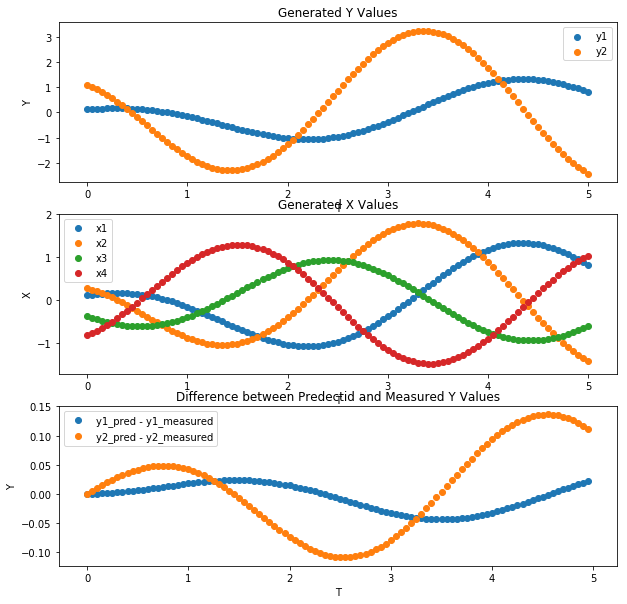

In [250]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(311)
y1=[val[0] for val in y_vals[:-1]]
y2=[val[1] for val in y_vals[:-1]]

plt.scatter(t, y1)
plt.scatter(t, y2)
ax1.set_title("Generated Y Values")
ax1.set_ylabel('Y')
ax1.set_xlabel('T')
ax1.legend(["y1", "y2"])

ax2 = plt.subplot(312)
x1=[val[0] for val in x_vals[:-1]]
x2=[val[1] for val in x_vals[:-1]]
x3=[val[2] for val in x_vals[:-1]]
x4=[val[3] for val in x_vals[:-1]]
plt.scatter(t, x1)
plt.scatter(t, x2)
plt.scatter(t, x3)
plt.scatter(t, x4)
ax2.set_title("Generated X Values")
ax2.set_ylabel('X')
ax2.set_xlabel('T')
ax2.legend(["x1", "x2", "x3", "x4"])


ax3 = plt.subplot(313)
y1_diff=[val[0] - measure[0] for val, measure in zip(y_vals[:-1], data_y)]
y2_diff=[val[1] - measure[1] for val, measure in zip(y_vals[:-1], data_y)]



plt.scatter(t[:-1], y1_diff)
plt.scatter(t[:-1], y2_diff)
ax3.set_title("Difference between Predectid and Measured Y Values")
ax3.set_ylabel('Y')
ax3.set_xlabel('T')
ax3.legend(["y1_pred - y1_measured", "y2_pred - y2_measured"])



In [239]:
y1_diff=[val[0] - measure[0] for val, measure in zip(y_vals[:-1], data_y)]


In [245]:
print(data)

[0.9719224039366106,
 0.8772694996050755,
 0.7719529674452268,
 0.6569756290252795,
 0.5334217814411708,
 0.40244851866213843,
 0.26527648750524413,
 0.123180148938145,
 -0.022522380840928724,
 -0.17047983190896,
 -0.31931854447020036,
 -0.467653412817695,
 -0.6140989257903866,
 -0.757280219365401,
 -0.8958440569148531,
 -1.0284696531833344,
 -1.15387925920226,
 -1.2708484271417666,
 -1.3782158764965093,
 -1.4748928859905546,
 -1.5598721391461727,
 -1.6322359555650403,
 -1.6911638445873312,
 -1.7359393230898057,
 -1.7659559447200386,
 -1.780722493798809,
 -1.7798673034118555,
 -1.763141663808496,
 -1.7304222940784288,
 -1.6817128571380042,
 -1.6171445052702598,
 -1.5369754507749884,
 -1.4415895636410108,
 -1.3314940054975224,
 -1.2073159163795995,
 -1.069798178000025,
 -0.919794284201776,
 -0.758262356020256,
 -0.586258345260911,
 -0.4049284766475414,
 -0.2155009843731135,
 -0.019277204244757318,
 0.18237791248245205,
 0.38804579307934606,
 0.5962646707386698,
 0.8055403676823194,
 1.0

### Problem 2

In [322]:
# first config
u = np.array([1])
x_prev = np.array([0 ,0])
x1_vals = []
x1_vals.append(x_prev)
F = np.array([
    [0.75 , 0.75],
    [-0.25 , 0.75]
    ])
G = np.array([[0.75], [0.75]])

for i in range(30):
    x_new = np.matmul(F, x_prev.transpose()) + np.matmul(G, u)
    x1_vals.append(x_new)
    x_prev = x_new

In [323]:
# Observability 1
H = np.array([1, 1])
HF = np.matmul(H, F)
np.block([
    [H],
    [HF]
])

array([[1.000000, 1.000000],
       [0.500000, 1.500000]])

In [324]:
# second config
u = np.array([1])
x_prev = np.array([0 ,0])
x2_vals = []
x2_vals.append(x_prev)
F = np.array([
    [0.75 , 0.75],
    [-0.375 , 1.125]
    ])
G = np.array([[0.75], [1.125]])

for i in range(30):
    x_new = np.matmul(F, x_prev.transpose()) + np.matmul(G, u)
    x2_vals.append(x_new)
    x_prev = x_new

In [321]:
# Observability 2
H = np.array([1, 1])
HF = np.matmul(H, F)
np.block([
    [H],
    [HF]
])

array([[1.000000, 1.000000],
       [0.375000, 1.875000]])

In [325]:
# third config
u = np.array([1])
x_prev = np.array([0, 0])
x3_vals = []
x3_vals.append(x_prev)
F = np.array([
    [1.25 , 1.25],
    [0.25 , 1.25]
    ])
G = np.array([[1.25], [1.25]])

for i in range(30):
    x_new = np.matmul(F, x_prev.transpose()) + np.matmul(G, u)
    x3_vals.append(x_new)
    x_prev = x_new

In [326]:
# Observability 3
H = np.array([1, 1])
HF = np.matmul(H, F)
np.block([
    [H],
    [HF]
])

array([[1.000000, 1.000000],
       [1.500000, 2.500000]])

In [315]:
k = [i for i in range(31)]

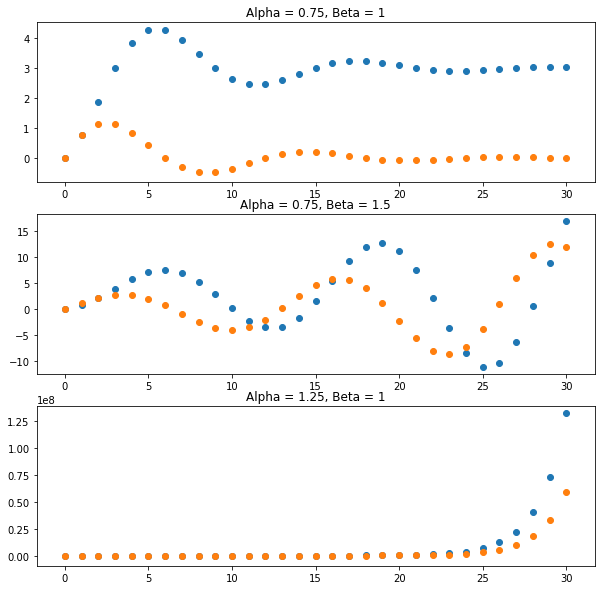

In [316]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(311)
ax1.set_title('Alpha = 0.75, Beta = 1')
plt.scatter(k, [val[0] for val in x1_vals])
plt.scatter(k, [val[1] for val in x1_vals])

ax2 = plt.subplot(312)
ax2.set_title('Alpha = 0.75, Beta = 1.5')
plt.scatter(k, [val[0] for val in x2_vals])
plt.scatter(k, [val[1] for val in x2_vals])


ax3 = plt.subplot(313)
ax3.set_title('Alpha = 1.25, Beta = 1')
plt.scatter(k, [val[0] for val in x3_vals])
plt.scatter(k, [val[1] for val in x3_vals])



In [317]:
x1_vals

[array([0, 0]),
 array([0.750000, 0.750000]),
 array([1.875000, 1.125000]),
 array([3.000000, 1.125000]),
 array([3.843750, 0.843750]),
 array([4.265625, 0.421875]),
 array([4.265625, 0.000000]),
 array([3.949219, -0.316406]),
 array([3.474609, -0.474609]),
 array([3.000000, -0.474609]),
 array([2.644043, -0.355957]),
 array([2.466064, -0.177979]),
 array([2.466064, 0.000000]),
 array([2.599548, 0.133484]),
 array([2.799774, 0.200226]),
 array([3.000000, 0.200226]),
 array([3.150169, 0.150169]),
 array([3.225254, 0.075085]),
 array([3.225254, 0.000000]),
 array([3.168941, -0.056314]),
 array([3.084470, -0.084470]),
 array([3.000000, -0.084470]),
 array([2.936647, -0.063353]),
 array([2.904971, -0.031676]),
 array([2.904971, 0.000000]),
 array([2.928728, 0.023757]),
 array([2.964364, 0.035636]),
 array([3.000000, 0.035636]),
 array([3.026727, 0.026727]),
 array([3.040090, 0.013363]),
 array([3.040090, 0.000000])]

In [274]:
len(k)

30

In [327]:
3 ** 2 * 7

63

In [328]:
63 ** 0.5

7.937253933193772

In [329]:
3/4 + 3**.5/4

1.1830127018922192

In [411]:
# first config
u = np.array([0])
x_prev = np.array([5 ,1])
x1_vals = []
x1_vals.append(x_prev)
F = np.array([
    [0.75 , 0.75],
    [-0.25 , 0.75]
    ])
G = np.array([[0.75], [0.75]])

for i in range(30):
    x_new = np.matmul(F, x_prev.transpose()) + np.matmul(G, u)
    x1_vals.append(x_new)
    x_prev = x_new
    
y1_vals = []
for i in range(10):
    y1_vals.append(np.matmul(H, x1_vals[i]))
print(y1_vals)

[6, 4.0, 1.5, -0.75, -2.25, -2.8125, -2.53125, -1.6875, -0.6328125, 0.31640625]


In [344]:
# Observability 1
H = np.array([1, 1])
HF = np.matmul(H, F)
np.block([
    [H],
    [HF]
])

array([[1.000000, 1.000000],
       [0.500000, 1.500000]])

In [412]:
# second config
u = np.array([0])
x_prev = np.array([5, 1])
x2_vals = []
x2_vals.append(x_prev)
F = np.array([
    [0.75 , 0.75],
    [-0.375 , 1.125]
    ])
G = np.array([[0.75], [1.125]])

for i in range(30):
    x_new = np.matmul(F, x_prev.transpose()) + np.matmul(G, u)
    x2_vals.append(x_new)
    x_prev = x_new
    
y2_vals = []
for i in range(10):
    y2_vals.append(np.matmul(H, x2_vals[i]))
print(y2_vals)

[6, 3.75, 0.28125, -3.69140625, -7.23779296875, -9.41802978515625, -9.516288757324219, -7.247757911682129, -2.8837212324142456, 2.7467503398656845]


In [380]:
# Observability 2
H = np.array([1, 1])
HF = np.matmul(H, F)
np.block([
    [H],
    [HF]
])

array([[1.000000, 1.000000],
       [0.375000, 1.875000]])

In [413]:
# third config
u = np.array([0])
x_prev = np.array([5, 1])
x3_vals = []
x3_vals.append(x_prev)
F = np.array([
    [1.25 , 1.25],
    [0.25 , 1.25]
    ])
G = np.array([[1.25], [1.25]])

for i in range(30):
    x_new = np.matmul(F, x_prev.transpose()) + np.matmul(G, u)
    x3_vals.append(x_new)
    x_prev = x_new
    
    
y3_vals = []
for i in range(10):
    y3_vals.append(np.matmul(H, x3_vals[i]))
print(y3_vals)

[6, 10.0, 17.5, 31.25, 56.25, 101.5625, 183.59375, 332.03125, 600.5859375, 1086.42578125]


In [398]:
# Observability 3
H = np.array([1, 1])
HF = np.matmul(H, F)
np.block([
    [H],
    [HF]
])

array([[1.000000, 1.000000],
       [1.500000, 2.500000]])

In [336]:
k = [i for i in range(31)]

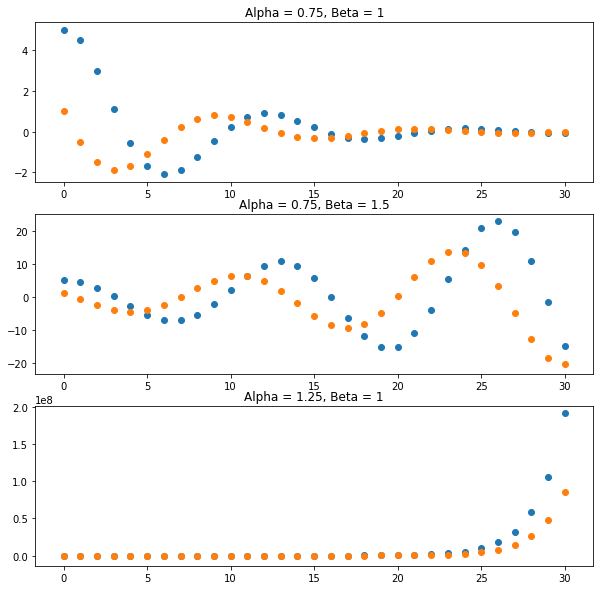

In [337]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(311)
ax1.set_title('Alpha = 0.75, Beta = 1')
plt.scatter(k, [val[0] for val in x1_vals])
plt.scatter(k, [val[1] for val in x1_vals])

ax2 = plt.subplot(312)
ax2.set_title('Alpha = 0.75, Beta = 1.5')
plt.scatter(k, [val[0] for val in x2_vals])
plt.scatter(k, [val[1] for val in x2_vals])


ax3 = plt.subplot(313)
ax3.set_title('Alpha = 1.25, Beta = 1')
plt.scatter(k, [val[0] for val in x3_vals])
plt.scatter(k, [val[1] for val in x3_vals])



### 2d

In [360]:
F

array([[0.750000, 0.750000],
       [-0.250000, 0.750000]])

In [399]:
O_rows = []
O_rows.append(H)
O_rows.append(np.matmul(H, F))
F_prev = F
for i in range(10-2):
    F_new = np.matmul(F_prev, F)
    O_rows.append(np.matmul(H, F_new))
    F_prev = F_new

In [400]:
len(O_rows)

10

In [401]:
P_blocks = []
for i in range(len(O_rows)): # use every block except the last one...
    P_blocks.append(np.matmul(O_rows[i], G))

In [387]:
zero = np.array([
    [0]
])

In [402]:
P = []
# get the element out of P_blocks
for i in range(10):
    # append a matrix to each column
    row = []
    for j in range(10):
        if i - j - 1 < 0:
            row.append(zero)
        else:
            if i-j-1 == 9:
                print("PANIC")
            row.append(P_blocks[i-j-1])
    P.append(row)

In [403]:
# concatenate the columns
rows = []
for i in range(10):
    row = P[i][0]
    for j in range(1, 10):
        row = np.block([row, P[i][j]])
    rows.append(row)
    
# concatenate the rows
P_Mat = rows[0]
for k in range(1, 10):
    P_Mat = np.block([[P_Mat], [rows[k]]])

In [404]:
P_Mat.shape

(10, 10)

In [405]:
# Create the O Matrix
O_Mat = O_rows[0]
for i in range(1, 10):
    O_Mat = np.block([[O_Mat], [O_rows[i]]])

In [406]:
O_Mat

array([[1.000000, 1.000000],
       [1.500000, 2.500000],
       [2.500000, 5.000000],
       [4.375000, 9.375000],
       [7.812500, 17.187500],
       [14.062500, 31.250000],
       [25.390625, 56.640625],
       [45.898438, 102.539062],
       [83.007812, 185.546875],
       [150.146484, 335.693359]])

In [407]:
O_Mat.shape

(10, 2)

In [373]:
y1_vals

[6, 4.0, 1.5, -0.75, -2.25, -2.8125, -2.53125, -1.6875, -0.6328125, 0.31640625]

In [185]:
# Reshape the input vectors
u_vec = data_u[1]
for i in range(1, 100):
    u_vec = np.block([u_vec, data_u[i+1][:]]) 

y_vec = data_y[0]
for i in range(1, 100):
    y_vec = np.block([y_vec, data_y[i][:]]) 
    

In [408]:
Os = np.matmul(np.linalg.inv(np.matmul(O_Mat.transpose(), O_Mat)), O_Mat.transpose())
diff = y3_vals

In [409]:
x3_0 = np.matmul(Os, diff)

In [378]:
x1_0

array([5.000000, 1.000000])

In [396]:
x2_0

array([5.000000, 1.000000])

In [410]:
x3_0

array([5.000000, 1.000000])

Text(0.5,1,'Generated Datasets')

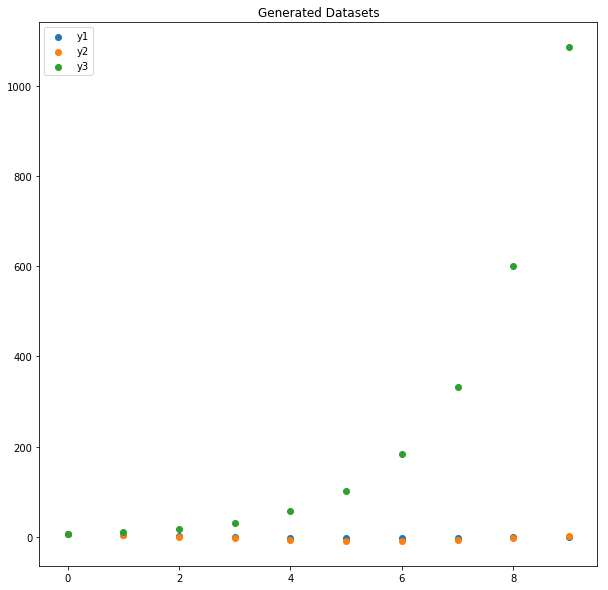

In [418]:
t = [i for i in range(10)]
fig = plt.figure(figsize=(10, 10))
plt.scatter(t, y1_vals)
plt.scatter(t, y2_vals)
plt.scatter(t, y3_vals)
plt.legend(["y1", "y2", "y3"])
plt.title("Generated Datasets")
